##Importing Required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as SC
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

#Data Cleaning

## Customer Information

In [ ]:
df_customers=pd.read_csv('twm_customer.csv', sep=';')
df_cx=df_customers.copy(deep=True) #Making a copy of customer dataset to make changes while cleaning
df_cx.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [ ]:
df_cx.isnull().sum()

cust_id            0
income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
name_prefix        0
first_name         0
last_name          0
street_nbr         0
street_name        0
postal_code        0
city_name          0
state_code         0
dtype: int64

In [ ]:
#Removing name prefix, first and last name, street number, and street name columns
df_cx.drop(['name_prefix', 'first_name', 'last_name', 'street_nbr', 'street_name'], axis=1, inplace=True)

In [ ]:
df_cx.columns

Index(['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status', 'postal_code', 'city_name', 'state_code'],
      dtype='object')

We can rename the columns properly by captilizing the their first later and removing '_' from some columns.

In [ ]:
df_cx.rename(columns={'cust_id': 'Customer ID', 'income':'Income', 'age':'Age','years_with_bank':'Years With Bank', 'nbr_children':'No of Children',
                   'gender':'Gender', 'marital_status': 'Marital Status', 'postal_code':'Postal Code','city_name': 'City', 'state_code':'State'}, inplace=True)
df_cx.head()

,Customer ID,Income,Age,Years With Bank,No of Children,Gender,Marital Status,Postal Code,City,State
0,1362691,26150,46,5,1,M,2,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,10138,New York City,NY


Marital status is not clearifie here. First, we need to see how mancy categories the column has.

In [ ]:
df_cx['Marital Status'].value_counts()

2    353
1    276
4     70
3     48
Name: Marital Status, dtype: int64

So, let's rename 1: Single, 2:Married, 3:Divorced, 4:Unknown

In [ ]:
df_cx['Marital Status'].replace({1:'Single', 2:'Married', 3:'Divorced', 4:'Unknown'}, inplace=True)
df_cx.head()

,Customer ID,Income,Age,Years With Bank,No of Children,Gender,Marital Status,Postal Code,City,State
0,1362691,26150,46,5,1,M,Married,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,Married,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,Single,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,Single,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,Unknown,10138,New York City,NY


We can also checke if there is any irregularities with City and State names.

In [ ]:
print(df_cx['City'].value_counts())
print()
print(df_cx['State'].value_counts())

New York City                               98
Los Angeles                                 84
Chicago                                     56
Houston                                     39
San Francisco                               23
                                            ..
Colorado Springs                             2
Dayton                                       2
Buffalo                                      1
Virginia Beach                               1
Arlington                                    1
Name: City, Length: 69, dtype: int64

CA      177
NY      107
TX       83
IL       56
AZ       24
OH       23
PA       21
TN       18
MO       17
OK       16
OR       16
IN       16
FL       16
WI       15
HI       13
MN       13
KY       13
NJ       12
CO       11
WA        9
NC        9
MI        9
MD        8
MA        8
NM        7
DC        6
VA        5
AL        4
NV        4
KS        3
NB        3
LA        3
GA        2
Name: State, dtype: int64


No issue with these two columns. Now we can clean the rest of the datasets to get them ready for analysis.

## Accounts

In [ ]:
df_accounts=pd.read_csv('twm_accounts.csv', sep=';')
df_acc=df_accounts.copy(deep=True)
df_acc.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [ ]:
df_acc.columns

Index(['acct_nbr', 'cust_id', 'acct_type', 'account_active', 'acct_start_date',
       'acct_end_date', 'starting_balance', 'ending_balance'],
      dtype='object')

In [ ]:

df_acc.rename(columns={ 'acct_nbr':'Acc Number' ,'cust_id':'Customer ID', 'acct_type': 'Acc Type','account_active': 'Active', 'acct_start_date':'Start Date','acct_end_date': 'End Date', 'starting_balance': 'Starting Balance', 'ending_balance': 'Ending Balance'}, inplace=True)
df_acc.head()

,Acc Number,Customer ID,Acc Type,Active,Start Date,End Date,Starting Balance,Ending Balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [ ]:
df_acc.isnull().sum()

Acc Number             0
Customer ID            0
Acc Type               0
Active                 0
Start Date             0
End Date            1266
Starting Balance       0
Ending Balance         0
dtype: int64

In [ ]:
df_acc.shape

(1409, 8)

It seems like 90% of data is missing in End Date column and we have no usage for it. It is better to drop the column. 

In [ ]:
df_acc.drop(['End Date'], axis=1, inplace=True)

#Transaction

In [ ]:
df_transactions=pd.read_csv('twm_transactions.csv', sep=';')
df_trans=df_transactions.copy(deep=True)
df_trans.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ


In [ ]:
df_trans.columns

Index(['tran_id', 'acct_nbr', 'tran_amt', 'principal_amt', 'interest_amt',
       'new_balance', 'tran_date', 'tran_time', 'channel', 'tran_code'],
      dtype='object')

In [ ]:
df_trans.drop(['tran_id', 'tran_time'], axis=1, inplace=True)
df_trans.rename(columns={'acct_nbr':'Acc Number', 'tran_amt':'Trans Amount', 'principal_amt':'Principal Amount', 'interest_amt':'Interest Amount','new_balance':'New Balance', 'tran_date':'Trans Date', 'channel':'Channel', 'tran_code':'Trans Code'}, inplace=True)
df_trans.head()

,Acc Number,Trans Amount,Principal Amount,Interest Amount,New Balance,Trans Date,Channel,Trans Code
0,13625623,0.00,0.00,0.0,3753.34,21.10.1995,A,IQ
1,13628392,0.00,0.00,0.0,254.49,5.2.1995,V,IQ
2,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,P,WD
3,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,,FK
4,13625722,0.00,0.00,0.0,240.55,25.1.1995,B,IQ


# Exploratory Data Analysis

## Customer Info

In [ ]:
df_cx.head()

,Customer ID,Income,Age,Years With Bank,No of Children,Gender,Marital Status,Postal Code,City,State
0,1362691,26150,46,5,1,M,Married,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,Married,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,Single,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,Single,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,Unknown,10138,New York City,NY


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



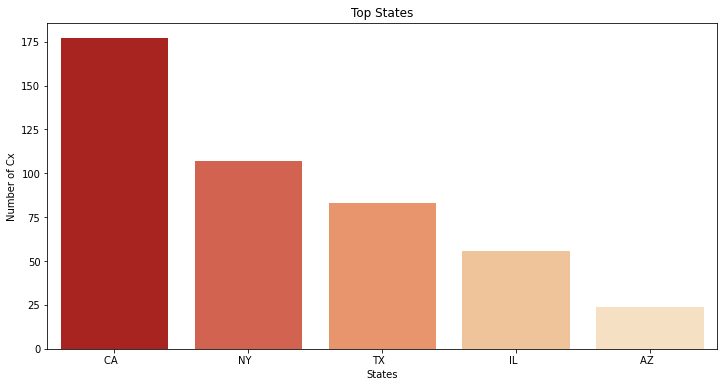

In [ ]:

cx_state=df_cx['State'].value_counts().head(5)
plt.figure(figsize=(12, 6))
sns.barplot(cx_state.index, cx_state.values, palette='OrRd_r')
plt.title('Top States')
plt.xlabel('States')
plt.ylabel('Number of Cx')
plt.show()

The graph shows that number of customers from California is higher than the rest of the states, followed by New York. We can also find out their percentage.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



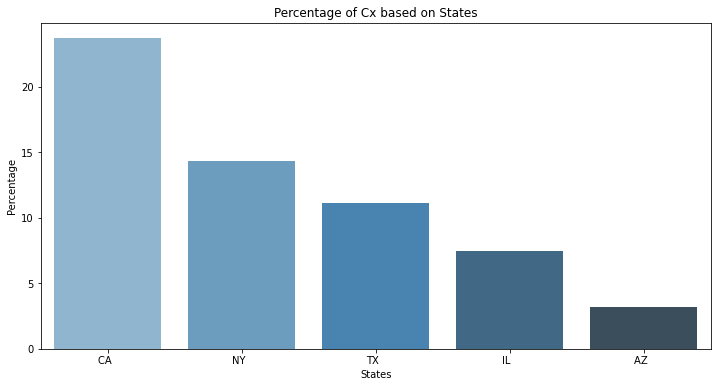

In [ ]:
df_perc=((df_cx['State'].value_counts()/df_cx['State'].count())*100).head(5)
plt.figure(figsize=(12, 6))
sns.barplot(df_perc.index, df_perc.values, palette='Blues_d')
plt.title('Percentage of Cx based on States', )
plt.xlabel('States')
plt.ylabel('Percentage')
plt.show()

This graph show that around 23% of customers are from California, followed by 14% from New York, and 12% from Texas. The first lesson learned from the two above graphs is that HQ of the bank may located in California and number of its branches could be higher than the New York and other states. Or its marketing strategy is more effective in California. So, the bank should either expand its branches in others states or work on its marketing strategies to attract more customers outside the California.

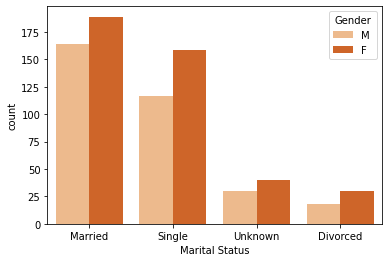

In [ ]:
#Marital Status of Customers based on Gender
ax=sns.countplot(x='Marital Status', hue='Gender', data=df_cx, palette='Oranges')

What we can learn from this graph is that Bank has more female customers than male regardless of their martial status. Additionally, it most of customers are married, followed by single as a second category. However, the customers who are divorced have the smallest number in this graph. So, bank may need to work on its marketing strategy to attract more divorced customers.

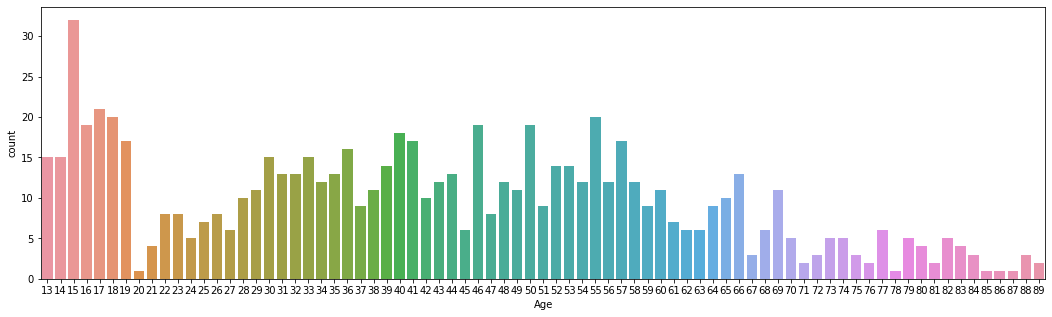

In [ ]:
# Number of Customers Based on Age
plt.figure(figsize=(18, 5))
ax=sns.countplot(x='Age', data=df_cx)

It is better to categorize the age group in order to make graph more readable.

In [ ]:
bins=[0, 15, 25, 64, 80]
labels=['Teen', 'Young', 'Adult', 'Senior']
df_cx['AgeGroup']=pd.cut(df_cx['Age'], bins=bins, labels=labels, right=False)
df_cx.head()

,Customer ID,Income,Age,Years With Bank,No of Children,Gender,Marital Status,Postal Code,City,State,AgeGroup
0,1362691,26150,46,5,1,M,Married,89194,Las Vegas,NV,Adult
1,1362487,6605,71,1,0,M,Married,90159,Los Angeles,CA,Senior
2,1363160,18548,38,8,0,F,Single,90024,Los Angeles,CA,Adult
3,1362752,47668,54,3,0,F,Single,90172,Los Angeles,CA,Adult
4,1362548,44554,59,9,2,F,Unknown,10138,New York City,NY,Adult


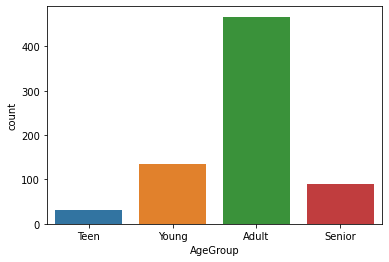

In [ ]:
ax=sns.countplot(x='AgeGroup', data=df_cx)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



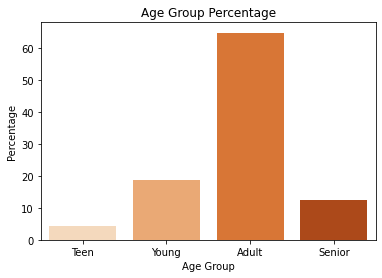

In [ ]:
# Age Groupd Percentage
df_agegroup=(df_cx['AgeGroup'].value_counts()/df_cx['AgeGroup'].count())*100
sns.barplot(df_agegroup.index, df_agegroup.values, palette='Oranges')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Age Group Percentage')
plt.show()



We can see that around 65% of customers are adults, 19% youngs, and 11% seniors, and 4% teens in this bank.

In [ ]:
df_cx.head()

,Customer ID,Income,Age,Years With Bank,No of Children,Gender,Marital Status,Postal Code,City,State,AgeGroup
0,1362691,26150,46,5,1,M,Married,89194,Las Vegas,NV,Adult
1,1362487,6605,71,1,0,M,Married,90159,Los Angeles,CA,Senior
2,1363160,18548,38,8,0,F,Single,90024,Los Angeles,CA,Adult
3,1362752,47668,54,3,0,F,Single,90172,Los Angeles,CA,Adult
4,1362548,44554,59,9,2,F,Unknown,10138,New York City,NY,Adult


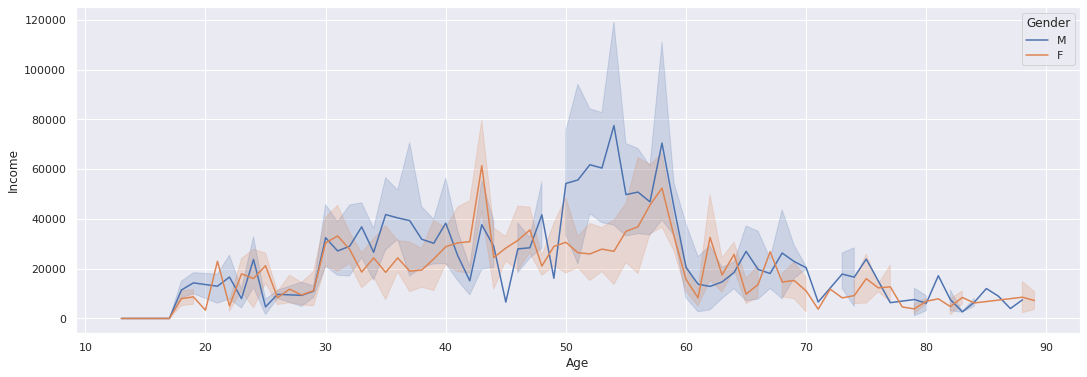

In [ ]:
plt.figure(figsize=(18, 6))
sns.set_theme(style='darkgrid')
sns.lineplot(x='Age', y='Income', hue='Gender', data=df_cx)


The graph says that income level increases to 40000/year during late twenties and it increases to 60000 and above. However, as the people and are retired, their incomes are also reduced, especially in early sixties. We can also learn from this graph that there a little bit difference in income level during the adulthood based on Gender, and males are intended to earn more than females.

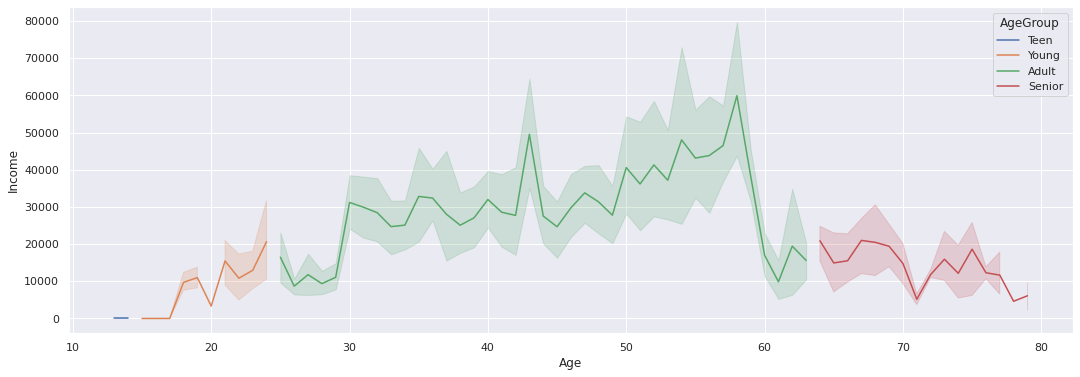

In [ ]:
plt.figure(figsize=(18, 6))
sns.set_theme(style='darkgrid')
sns.lineplot(x='Age', y='Income', hue='AgeGroup', data=df_cx)

This shows the income level of customers based on their age group. As it seems, the teens have no income. Young people earn around ten to twenty thousand when they are 17 to 25 years old. As they get adult, their earning increased annually to 30000   and it grows to  60000 or even near to 80000$. As the people age and stop working, their income also reduced. 

# Machine Learning-Clustering

## Feature Engineering or Data Preparation for Clustering

Before modeling we have to change the required data to numeric format since the KMeans doesn't work categorical data. To do, first we change Gender, marital status, and Age Group to category and then create their dummy variables.

In [ ]:
cx_features=df_cx[['Income', 'Age', 'Years With Bank', 'No of Children',
       'Gender', 'Marital Status', 'AgeGroup']]
cx_features.head()

,Income,Age,Years With Bank,No of Children,Gender,Marital Status,AgeGroup
0,26150,46,5,1,M,Married,Adult
1,6605,71,1,0,M,Married,Senior
2,18548,38,8,0,F,Single,Adult
3,47668,54,3,0,F,Single,Adult
4,44554,59,9,2,F,Unknown,Adult


In [ ]:
# Changing the gender and marital status to catorical dtype, and creating dummy variables for each group
cx_features['Gender']=cx_features['Gender'].astype('category')
cx_features['Marital Status']=cx_features['Marital Status'].astype('category')
cx_features['No of Children']=cx_features['No of Children'].astype('category')
cx_features_dum=pd.get_dummies(cx_features, drop_first=True)
df_cx=cx_features_dum
df_cx.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Income,Age,Years With Bank,No of Children_1,No of Children_2,No of Children_3,No of Children_4,No of Children_5,Gender_M,Marital Status_Married,Marital Status_Single,Marital Status_Unknown,AgeGroup_Young,AgeGroup_Adult,AgeGroup_Senior
0,26150,46,5,1,0,0,0,0,1,1,0,0,0,1,0
1,6605,71,1,0,0,0,0,0,1,1,0,0,0,0,1
2,18548,38,8,0,0,0,0,0,0,0,1,0,0,1,0
3,47668,54,3,0,0,0,0,0,0,0,1,0,0,1,0
4,44554,59,9,0,1,0,0,0,0,0,0,1,0,1,0


In [ ]:
df_cx.corr().style.background_gradient(cmap='Blues')

,Income,Age,Years With Bank,No of Children_1,No of Children_2,No of Children_3,No of Children_4,No of Children_5,Gender_M,Marital Status_Married,Marital Status_Single,Marital Status_Unknown,AgeGroup_Young,AgeGroup_Adult,AgeGroup_Senior
Income,1.000000,0.244919,0.040604,0.152961,0.167680,0.056065,0.108676,0.094347,0.147011,0.164599,-0.295303,0.060656,-0.364974,0.504635,-0.118785
Age,0.244919,1.000000,0.181478,0.060873,-0.044046,-0.095111,0.004295,0.012322,0.008516,0.412111,-0.502998,0.081631,-0.605885,0.101078,0.524885
Years With Bank,0.040604,0.181478,1.000000,0.060604,-0.026617,-0.030737,-0.065020,0.012737,0.004427,0.055764,-0.027494,-0.028405,-0.220581,0.008415,0.188887
No of Children_1,0.152961,0.060873,0.060604,1.000000,-0.176351,-0.098247,-0.046864,-0.049433,-0.001566,0.232108,-0.324859,0.119018,-0.112246,0.259392,-0.156075
No of Children_2,0.167680,-0.044046,-0.026617,-0.176351,1.000000,-0.096204,-0.045890,-0.048405,-0.018622,0.196882,-0.318105,0.060825,-0.155901,0.290555,-0.152830
No of Children_3,0.056065,-0.095111,-0.030737,-0.098247,-0.096204,1.000000,-0.025566,-0.026967,0.003236,0.073741,-0.177220,0.134613,-0.108733,0.179262,-0.085143
No of Children_4,0.108676,0.004295,-0.065020,-0.046864,-0.045890,-0.025566,1.000000,-0.012864,0.000893,0.018359,-0.084535,0.132908,-0.051866,0.085509,-0.040614
No of Children_5,0.094347,0.012322,0.012737,-0.049433,-0.048405,-0.026967,-0.012864,1.000000,0.037442,0.006403,-0.089168,0.082457,-0.054709,0.090196,-0.042840
Gender_M,0.147011,0.008516,0.004427,-0.001566,-0.018622,0.003236,0.000893,0.037442,1.000000,0.046067,-0.025466,-0.007680,0.003799,-0.026070,-0.009973
Marital Status_Married,0.164599,0.412111,0.055764,0.232108,0.196882,0.073741,0.018359,0.006403,0.046067,1.000000,-0.724575,-0.304364,-0.360937,0.223318,0.173342


Now our data is ready for clustering but before clustering, we need to find out how many clusters can we have by using different types of scalers and Elbow Curve.

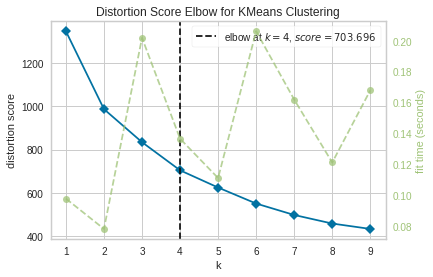

In [ ]:
# Elbow Curve with MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
from sklearn.preprocessing import MaxAbsScaler, RobustScaler

scaler=MinMaxScaler()
df_cx_scaled=pd.DataFrame(scaler.fit_transform(df_cx), columns=df_cx.columns)

model=KMeans()
visualizer=KElbowVisualizer(model, k=(1, 10)) #visualize from 1 to 10 clusters to find out the number of proper cluster
visualizer.fit(df_cx_scaled)
visualizer.poof()



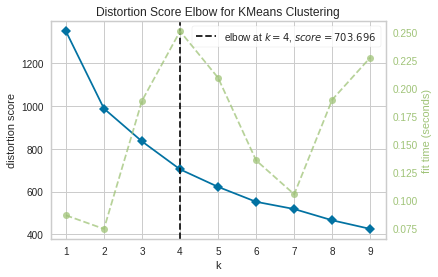

In [ ]:
#Elbow Curve with MaxAbs Scaler

scaler=MaxAbsScaler()
df_cx_mas=pd.DataFrame(scaler.fit_transform(df_cx), columns=df_cx.columns)

model=KMeans()
visualizer=KElbowVisualizer(model, k=(1, 10)) #visualize from 1 to 10 clusters to find out the number of proper cluster
visualizer.fit(df_cx_scaled)
visualizer.poof()

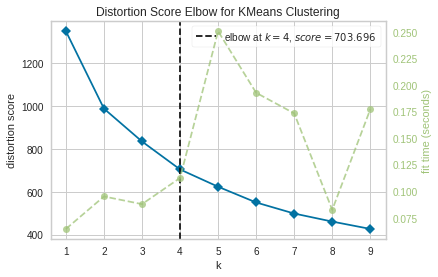

In [ ]:
#Elbow Curve with Robust Scaler

scaler=RobustScaler()
df_cx_rb=pd.DataFrame(scaler.fit_transform(df_cx), columns=df_cx.columns)

model=KMeans()
visualizer=KElbowVisualizer(model, k=(1, 10)) #visualize from 1 to 10 clusters to find out the number of proper cluster
visualizer.fit(df_cx_scaled)
visualizer.poof()

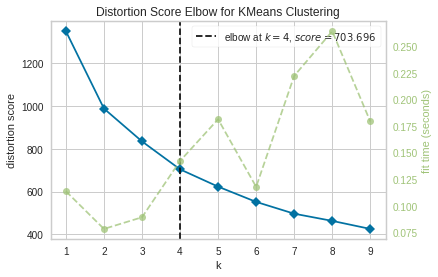

In [ ]:
#Eblow Curve with Standard Scaler

scaler=SC()
df_cx_sts=pd.DataFrame(scaler.fit_transform(df_cx), columns=df_cx.columns)

model=KMeans()
visualizer=KElbowVisualizer(model, k=(1, 10)) #visualize from 1 to 10 clusters to find out the number of proper cluster
visualizer.fit(df_cx_scaled)
visualizer.poof()

### So, the four elbow curves, except the Standard Scaler, show that it is better to divide the data into four clusters.

##Principal Component Analysis

In [ ]:
# PCA with MinMaxScaler
df_cx_scaled['cluster']=KMeans(n_clusters=4, n_init=10).fit_predict(df_cx_scaled)
df_cx_scaled=pd.DataFrame(df_cx_scaled)

pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(df_cx_scaled), columns=['PC 1', 'PC 2'])
pca_df['cluster']=df_cx_scaled['cluster']

def plot_pca(data):
  df=[]
  for cluster in data.cluster.unique():
    to_plot=data[data['cluster']==cluster]
    df.append(go.Scatter(x=to_plot['PC 1'],
                         y=to_plot['PC 2'],
                         mode='markers', name=f'cluster_{cluster}'))
    layout=go.Layout(title='PCA Plot', xaxis_title='PC 1', yaxis_title='PC 2')
    fig=go.Figure(data=df, layout=layout)
    fig.show()

plot_pca(pca_df)

In [ ]:
# PCA with Robust Scaler
df_cx_rb['cluster']=KMeans(n_clusters=4, n_init=10).fit_predict(df_cx_rb)
df_cx_rb=pd.DataFrame(df_cx_rb)

pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(df_cx_rb), columns=['PC 1', 'PC 2'])
pca_df['cluster']=df_cx_rb['cluster']

def plot_pca(data):
  df=[]
  for cluster in data.cluster.unique():
    to_plot=data[data['cluster']==cluster]
    df.append(go.Scatter(x=to_plot['PC 1'],
                         y=to_plot['PC 2'],
                         mode='markers', name=f'cluster_{cluster}'))
    layout=go.Layout(title='PCA Plot', xaxis_title='PC 1', yaxis_title='PC 2')
    fig=go.Figure(data=df, layout=layout)
    fig.show()

plot_pca(pca_df)

In [ ]:
df_cx_rb.head()

,Income,Age,Years With Bank,No of Children_1,No of Children_2,No of Children_3,No of Children_4,No of Children_5,Gender_M,Marital Status_Married,Marital Status_Single,Marital Status_Unknown,AgeGroup_Young,AgeGroup_Adult,AgeGroup_Senior,cluster
0,0.367803,0.142857,0.25,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2
1,-0.439192,1.035714,-0.75,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.0,1.0,3
2,0.053923,-0.142857,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
3,1.256260,0.428571,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,1.127686,0.607143,1.25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [ ]:
# Radar Chart with MinMax Scaler
df_radar_sc=df_cx_scaled.groupby('cluster').mean().divide(df_cx_scaled.drop('cluster', axis=1).mean())*100

def radar_chart(df):
  data=[]
  for i in range(0, len(df)):
    data.append(go.Scatterpolar(r=df.iloc[i].values,
                                theta=df.iloc[i].index,
                                name=f'cluster_{df.index[i]}'))
    #mean line
    data.append(go.Scatterpolar(r=[20]*df.shape[1],
                                theta=df.columns,
                                name='mean'))
    
    layout=go.Layout(polar=dict(radialaxis=dict(visible=True)), showlegend=True)
    fig=go.Figure(data=data, layout=layout)
    fig.show()

radar_chart(df_radar_sc)